# Our first machine learning model: Logistic Regression

In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split

# This is our Logit model
from sklearn.linear_model import LogisticRegression

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Lets us display multiple non-plaintext outputs
from IPython.display import display, HTML

# Sets a bigger font size
plt.rc('font', size=18)
plt.rc('axes', titlesize=18, labelsize=24)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', title_fontsize=18, fontsize=18)
plt.rc('figure', titlesize=24, titleweight='bold')

In [2]:
# Constants to be shared by all trainings
TEST_SIZE = 0.2
RANDOM_STATE = 45

# Import and inspect the Titanic dataset.
* Load the titanic data set into a pandas dataframe.

In [3]:
# Load the titanic data set into a pandas dataframe.

df_1 = pd.read_csv('data/titanic.csv')

# Display data
df_1.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>

# Identify which columns have null values. 
Inspect which varibles may be good / not good for using as features based on null values. 


In [4]:
# Identify which columns have null values. 

df_1.isnull() \
    .sum() \
    .sort_values(ascending=False) \
    .to_frame('nulls') \
    .query('nulls > 0')

,nulls
cabin,687
age,177
embarked,2


# Check to see if our data has any duplicate rows.
If so, remove the duplicates.

In [5]:
# Check to see if our data has any duplicate rows.

df_1.duplicated() \
    .sum()

0

# Use sns.pariplot to visualize.
* Set the hue='survived'.

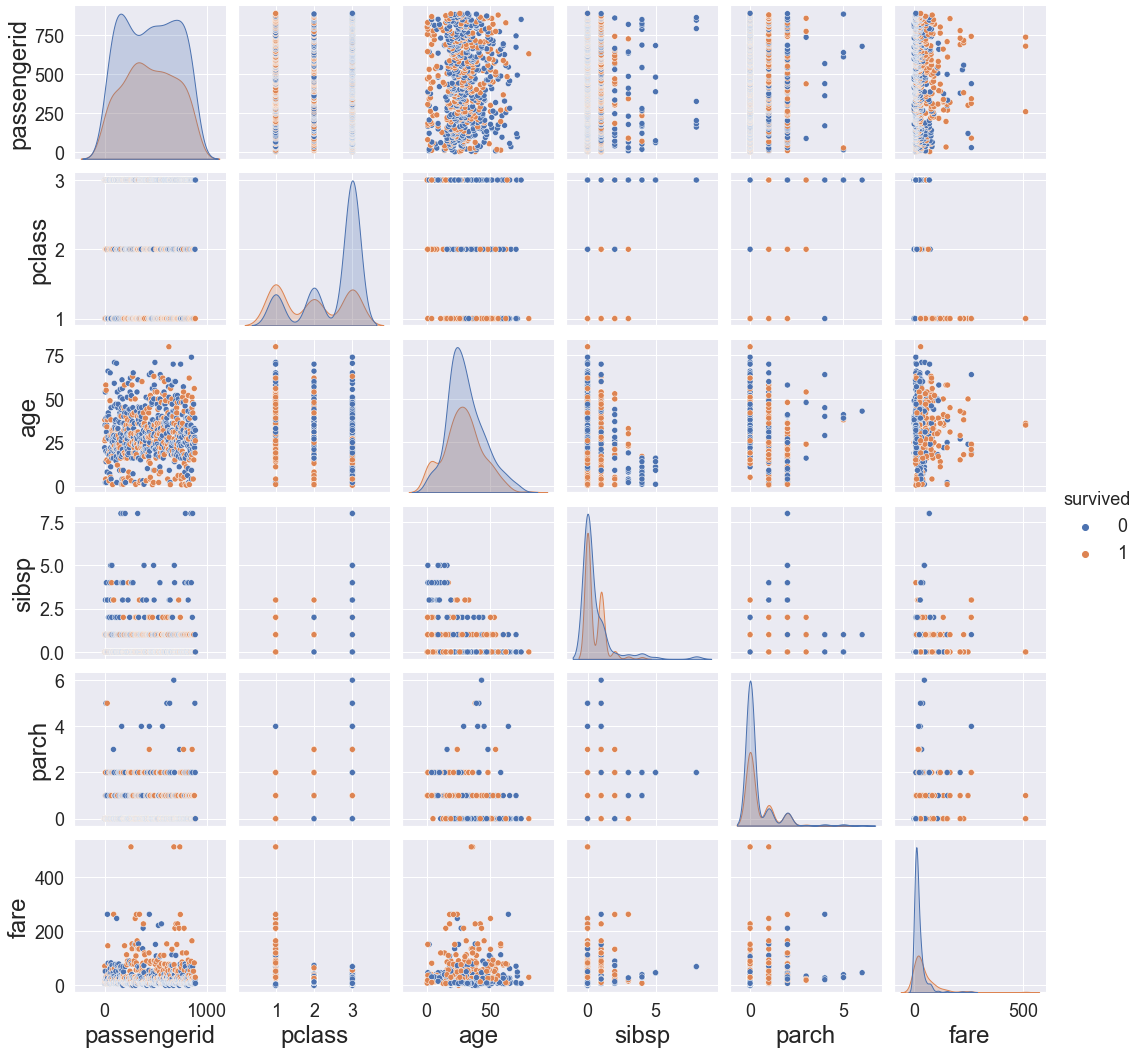

In [6]:
# Use sns.pariplot to visualize.

df_1.pipe(sns.pairplot,
          hue='survived')
plt.show()

# Feature Engineering
For your first model, only include use the `fare` and `sex` as features.
* Convert the `sex` feature to a continuous value by using `pd.get_dummies()`.
* Drop the `sex_female` column as it is the identical inverse of `sex_male`. 
    * Hint, you can use `drop_first=True` in the `pd.get_dummies()` function to have this done automatically.
* Create a `selected_features` variable that is a list of `fare` and `sex_male`.  
* Define your X and y variables.
    * `X` is your selected features
    * `y` is your target features (survived). 
* Split your data into training and testing groups by using `train_test_split()`
    * __IMPORTANT: In `train_test_split` set `random_state=45`, so when you make another model, you can run it on the same random split of data.__

In [7]:
# Convert the sex column into a continuous variable by using pd.get_dummies
df_1 = pd.get_dummies(df_1,
                      columns=['sex'],
                      drop_first=True)
df_1.head()

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


# Select our features 
   * only include use the `fare` and `sex_male` as features for this model.

In [8]:
# Select our features
selected_features_1 = ['fare',
                       'sex_male']

# Set X to be the features we are going to use.
X_1 = df_1[selected_features_1]

# Set y to be our target variable. 
y_1 = df_1['survived']

X_1.join(y_1)

,fare,sex_male,survived
0,7.2500,1,0
1,71.2833,0,1
2,7.9250,0,1
3,53.1000,0,1
4,8.0500,1,0
...,...,...,...
886,13.0000,1,0
887,30.0000,0,1
888,23.4500,0,0
889,30.0000,1,1


# Split our data into the testing and training groups. 

In [9]:
# Split our data into testing and training.
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Print the length and width of our testing data.
pd.DataFrame({'Training Data': X_train_1.shape,
              'Test Data': X_test_1.shape},
             index=('Length', 'Width'))

,Training Data,Test Data
Length,712,179
Width,2,2


# Build and train your model
* Initialize an empty Logistic Regression model. 
* Fit your model with your training data. 
* Predict the values of your testing data

In [10]:
# Initalize our model
model_1 = LogisticRegression()

# Train our model using our training data.
model_1.fit(X_train_1,
            y_train_1)

model_1.score(X_test_1, y_test_1) # Should match F1 score if all the later steps are done right

0.8268156424581006

# Evaluate your model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
    * Hint, sklearn provides helper functions for this.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?

In [11]:
# 1. Make predictions of your test data and save them as `y_pred`. 
y_pred_1 = model_1.predict(X_test_1)

pd.DataFrame({'y_true': y_test_1,
              'y_pred': y_pred_1,
              'probability': model_1.predict_proba(X_test_1)
                                    [:,1]
                                    .round(2)})

,y_true,y_pred,probability
248,1,0,0.26
197,0,0,0.17
133,1,1,0.71
169,0,0,0.27
736,0,1,0.73
...,...,...,...
886,0,0,0.18
751,1,0,0.18
804,1,0,0.17
596,1,1,0.72


In [12]:
# 2. Calculate and print the accuracy, precision, recall, and f1 scores of your model.

# Calculate our accuracy
accuracy_1 = accuracy_score(y_test_1,
                            y_pred_1)

# Calculate our precision score
precision_1 = precision_score(y_test_1,
                              y_pred_1)

# Calculate our recall score
recall_1 = recall_score(y_test_1,
                        y_pred_1)

f1_1 = f1_score(y_test_1,
                y_pred_1)

# Print each of our scores to inspect performance.
pd.DataFrame.from_dict({'Accuracy': accuracy_1,
                        'Precision': precision_1,
                        'Recall': recall_1,
                        'F1': f1_1},
                       orient='index',
                       columns=['Score']) \
            .style.format('{:.2f}'.format)

,Score
Accuracy,0.83
Precision,0.74
Recall,0.77
F1,0.76


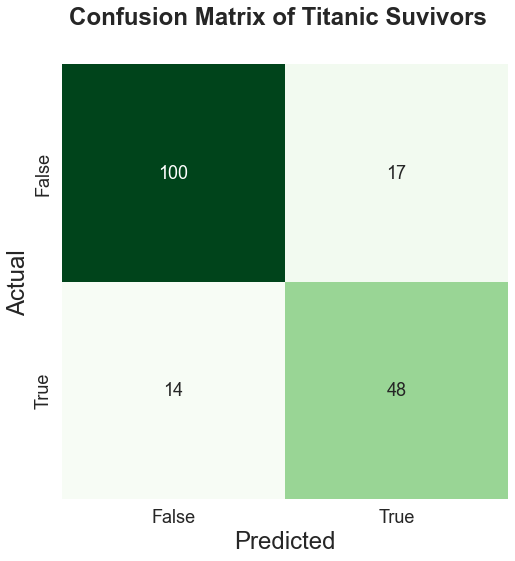

In [13]:
# 1. Plot a confusion matrix of your predicted results. 

cm_1 = confusion_matrix(y_test_1,
                        y_pred_1)
fig = plt.figure(figsize=(8,8))
sns.heatmap(cm_1,
            xticklabels=['False', 'True'],
            yticklabels=['False', 'True'],
            annot=True,
            fmt='.0f',
            cmap='Greens',
            cbar=False) \
   .set(xlabel='Predicted',
        ylabel='Actual')
plt.suptitle('Confusion Matrix of Titanic Suvivors')
plt.show()

In [14]:
# How many True Positives and True Negatives did your model get?
true_negatives, false_positives, false_negatives, true_positives = cm_1.ravel()
print(f'{true_negatives} true negatives and {true_positives} true positives')

100 true negatives and 48 true positives


# Create another model, call this `model_2`.  This time also include the p_class and embarked features. 
1. Run `pd.get_dummies()` on pclass and embarked of your DataFrame.
1. Update your `selected_features` to include the new pclass, embarked, sibsp, and parch features.
1. Define your `X` and `y` variables.
1. Break your data into training and testing groups.
    * __IMPORTANT, In `train_test_split` set `random_state=45` so we will be using the same data rows as our first model__.
1. Initialize a new model, call this one `model_2`
1. Fit / Train your new model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?
    
Compare the results to your first model. Which model had a better accuracy, recall, precision, and f1 score.

,Score
Accuracy,0.77
Precision,0.69
Recall,0.59
F1,0.64


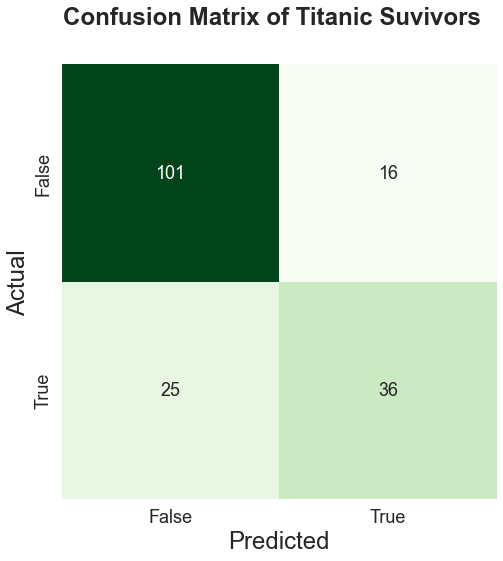

In [15]:
df_2 = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on pclass and embarked of your DataFrame.
df_2.dropna(subset=['embarked'],
            inplace=True) # “embarked” was one of the columns with null values.
df_2 = pd.get_dummies(df_2,
                      columns=['sex',
                               'pclass',
                               'embarked'],
                      drop_first=True)

# Update your `selected_features` to include the new pclass and embarked features. 
selected_features_2 = ['fare',
                       'sex_male',
                       'pclass_2',
                       'pclass_3',
                       'embarked_Q',
                       'embarked_S']

# Define your X and y variables
X_2 = df_2[selected_features_2]
y_2 = df_2['survived']

# Split our data into testing and training.
# !!! Remeber to use the same random state as you used before
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Initalize our model_2
model_2 = LogisticRegression()

# Fit / Train our model using our training data.
model_2.fit(X_train_2,
            y_train_2)

# Make new predicitions using our testing data. 
y_pred_2 = model_2.predict(X_test_2)

# Calculate our accuracy
accuracy_2 = accuracy_score(y_test_2,
                            y_pred_2)

# Calculate our precision score
precision_2 = precision_score(y_test_2,
                              y_pred_2)

# Calculate our recall score
recall_2 = recall_score(y_test_2,
                        y_pred_2)

# Calculate your f1-score
f1_2 = f1_score(y_test_2,
                y_pred_2)

# Print each of our scores to inspect performance.
pd.DataFrame.from_dict({'Accuracy': accuracy_2,
                        'Precision': precision_2,
                        'Recall': recall_2,
                        'F1': f1_2},
                       orient='index',
                       columns=['Score']) \
            .style.format('{:.2f}'.format) \
            .pipe(display)

# Plot your confusion matrix.
cm_2 = confusion_matrix(y_test_2,
                        y_pred_2)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_2,
            xticklabels=['False', 'True'],
            yticklabels=['False', 'True'],
            square=True,
            annot=True,
            fmt='.0f',
            cmap='Greens',
            cbar=False) \
   .set(xlabel='Predicted',
        ylabel='Actual')
plt.suptitle('Confusion Matrix of Titanic Suvivors')
plt.show()

# EXTRA CREDIT
* Use age as a feature. 
* How will you fill the null values?
    * Hint, use `df.age.fillna(???)`
* Make a new feature that 'traveled_alone'.  The sibsp and parch contain the amout of people they are traveling with. Mark everyone that has no sibsp or parch as traveled alone set to 1 and everyone else set to 0. 
    * Once you have this traveled_alone column, you dont need to use the the sibsp and parch cols in your model.

C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Score
Accuracy,0.79
Precision,0.72
Recall,0.62
F1,0.67


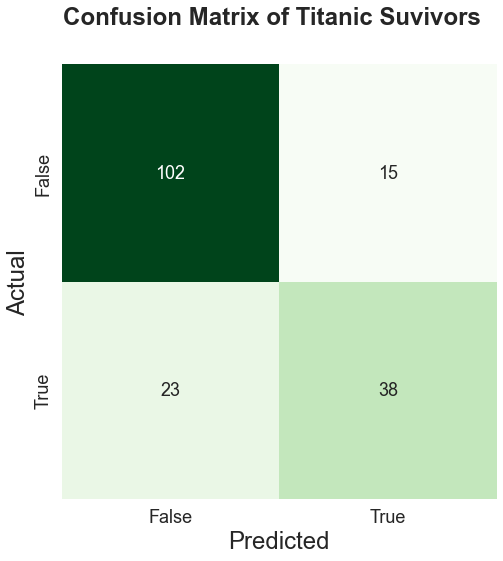

In [16]:
df_3 = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on sex, pclass, and embarked of your DataFrame.
df_3.dropna(subset=['embarked'],
            inplace=True) # “embarked” was one of the columns with null values.
df_3 = pd.get_dummies(df_3,
                      columns=['sex',
                               'pclass',
                               'embarked'],
                      drop_first=True)

# Fill null age values with mean age.
df_3.age.fillna(df_3.age.mean(),
                inplace=True)

# Create new traveled_alone feature
df_3['traveled_alone'] = np.where((df_3.sibsp == 0) & (df_3.parch == 0), 1, 0)

# Update your `selected_features` to include the new traveled alone and age
selected_features_3 = ['fare',
                       'sex_male',
                       'pclass_2',
                       'pclass_3',
                       'embarked_Q',
                       'embarked_S',
                       'age',
                       'traveled_alone']

# Define your X and y variables
X_3 = df_3[selected_features_3]
y_3 = df_3['survived']

# Split our data into testing and training.
# Remeber to use the same random state as you used before
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=TEST_SIZE, random_state=RANDOM_STATE)


# Initalize our model
model_3 = LogisticRegression()

# Fit / Train our model using our training data.
model_3.fit(X_train_3,
            y_train_3)

# Make new predicitions using our testing data. 
y_pred_3 = model_3.predict(X_test_3)

# Calculate our accuracy
accuracy_3 = accuracy_score(y_test_3,
                            y_pred_3)

# Calculate our precision score
precision_3 = precision_score(y_test_3,
                              y_pred_3)

# Calculate our recall score
recall_3 = recall_score(y_test_3,
                        y_pred_3)

# Calculate your f1-score
f1_3 = f1_score(y_test_3,
                y_pred_3)

# Print each of our scores to inspect performance.
pd.DataFrame.from_dict({'Accuracy': accuracy_3,
                        'Precision': precision_3,
                        'Recall': recall_3,
                        'F1': f1_3},
                       orient='index',
                       columns=['Score']) \
            .style.format('{:.2f}'.format) \
            .pipe(display)

# Plot your confusion matrix.
cm_3 = confusion_matrix(y_test_3,
                      y_pred_3)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_3,
            xticklabels=['False', 'True'],
            yticklabels=['False', 'True'],
            square=True,
            annot=True,
            fmt='.0f',
            cmap='Greens',
            cbar=False) \
   .set(xlabel='Predicted',
        ylabel='Actual')
plt.suptitle('Confusion Matrix of Titanic Suvivors')
plt.show()

In [17]:
def try_training(df, continuous_features, categorical_features, target, test_size, random_state):
    columns = continuous_features + categorical_features + [target]
    df = df[columns]
    df = df.dropna(subset=columns)
    df = pd.get_dummies(df,
                        columns=categorical_features,
                        drop_first=True)
    features = [column_name
                for column_name
                in df.columns
                if column_name != target]
    X_train, X_test, y_train, y_test = train_test_split(df[features],
                                                        df[target],
                                                        test_size=test_size,
                                                        random_state=random_state)
    model = LogisticRegression()
    model.fit(X_train,
              y_train)
    y_pred = model.predict(X_test)
    cm = pd.DataFrame(confusion_matrix(y_test,
                                       y_pred),
                      columns=[['Predicted', 'Predicted'], ['Positive', 'Negative']],
                      index=[['Actually', 'Actually'], ['True', 'False']])
    scores = pd.DataFrame \
               .from_dict({func.__name__: func(y_test, y_pred)
                           for func
                           in (accuracy_score, precision_score, recall_score, f1_score)},
                          orient='index',
                          columns=['Value'])
    return cm, scores

def display_dataframes(dataframes):
    display(HTML(''.join((dataframe.style \
                                   .set_table_attributes('style="display:inline"') \
                                   .set_caption(caption) \
                                   ._repr_html_()
                          for caption, dataframe
                          in dataframes.items()))))

# Constants for all the feature sets
DATA_FRAME = pd.read_csv('data/titanic.csv')
TARGET = 'survived'
TEST_SIZE = 0.2
RANDOM_STATE = 45

display(HTML('Just to check our work in a more systematic manner, we package the entire training routine in a function '
             'and run it with all the different parameters.'))

# fare and sex
display(HTML('<strong>Features: fare and sex</strong>'))
cm, scores = try_training(DATA_FRAME,
                          ['fare'],
                          ['sex'],
                          TARGET,
                          TEST_SIZE,
                          RANDOM_STATE)
display_dataframes({'Confusion Matrix': cm,
                    'Scores': scores})

display(HTML('<hr>'))

# fare, sex, pclass, and embarked
display(HTML('<strong>Features: fare, sex, pclass, and embarked</strong>'))
cm, scores = try_training(DATA_FRAME,
                          ['fare'],
                          ['sex', 'pclass', 'embarked'],
                          TARGET,
                          TEST_SIZE,
                          RANDOM_STATE)
display_dataframes({'Confusion Matrix': cm,
                    'Scores': scores})

display(HTML('<hr>'))

# fare, sex, pclass, and embarked, age, traveled_alone
display(HTML('<strong>Features: fare, sex, pclass, and embarked, age, traveled_alone</strong>'))
augmented_df = DATA_FRAME.assign(traveled_alone=np.where((DATA_FRAME.sibsp == 0) & (DATA_FRAME.parch == 0), 1, 0))
augmented_df.age.fillna(augmented_df.age.mean(), inplace=True)
cm, scores = try_training(augmented_df,
                          ['fare', 'age'],
                          ['sex', 'pclass', 'embarked', 'traveled_alone'],
                          TARGET,
                          TEST_SIZE,
                          RANDOM_STATE)
display_dataframes({'Confusion Matrix': cm,
                    'Scores': scores})

C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
